# Project report

<img align="left" src="https://cdn.mos.cms.futurecdn.net/KEnZEGi8VJvks7NGKogrxG-1200-80.jpg" width="600" />

## Introduction
It is without a doubt that tennis is a very popular sport all around the world. There are several huge tournaments that occur yearly such as Wimbledon, US Open, and Australian Open. In the data set that we are working with today, it shows the statistics of the top 500 tennis players around the world. We want to analyze and tidy this data set from the original set so there’s a clear and concise set of data to use for our project. In our data set we need to tidy the set by highest rank, so number one comes out first and then second and so on. We want to see what percentage of players who are right handed versus the players who are left handed and where they fall on their rankings.

## Setup

In [43]:
set.seed(2000)
library(tidyverse)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
library(digest)
library(tidymodels)
library(GGally)
library(ISLR)

## Data Reading

In [44]:
raw_data <- read_csv("player_stats.csv")
raw_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Data Wrangling
First, because we want to predict the price money of players, so we delete all irrelevant columns like Country, Name, Favorite Surface.
Plus, we delete Rafael Madal(whose current rank is 1) beacuse his price money is tremendously larger than other players(10 times larger than the player just behind him).
Second, we use mutate function to remove unuseful characters and signals in Height, Current Rank, Price Money columns etc.
Thirdly, we use mutae and replace_na functions to set all NAs(indicate the player doesn't have any titles) in Title columns into 0.
Fourth, we use mutate and ifelse functions to set factor columns Backhand and Plays into 1 and 0s because we may use them as predictors subsequently.
Fifth, we use mutate and str_remove functions to remove all the useless information in columns like Current Rank, Peak Elo Rating, Age, Height.
Six, we use arrange function to rank the players in the dataset acording to their current rank.

In [45]:
set.seed(2000)
tidy_data <- raw_data %>%
             select(Age:'Titles') %>%
             select(-Wikipedia, -'Best Rank', -Country, -Name, -'Favorite Surface', -'Last Appearance', -Active) %>%
             mutate(Titles = replace_na(Titles, 0)) %>%
             mutate(Plays = as.integer(ifelse(Plays == "Right-handed",1,0))) %>%
             mutate(Backhand = as.integer(ifelse(Backhand == "Two-handed",1,0))) %>%
             mutate(`Current Rank` = as.integer(str_remove(string = raw_data$`Current Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Elo Rank` = as.integer(str_remove(string = raw_data$`Best Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Rank` = as.integer(str_remove(string = raw_data$`Best Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Current Elo Rank` = as.integer(str_remove(string = raw_data$`Current Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Elo Rank` = as.integer(str_remove(string = raw_data$`Best Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Peak Elo Rating` = as.integer(str_remove(string = raw_data$`Peak Elo Rating`, pattern = "\\(.*\\)"))) %>%
             mutate(`Prize Money` = as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))) %>%
             mutate(Age = as.integer(str_sub(Age, 1, 2))) %>%
             mutate(Height = as.integer(str_sub(Height, 1, 3))) %>%
             arrange(`Current Rank`) %>%
             filter(`Current Rank` != 1) %>%
             rename_with(~ tolower(gsub(" ", "_", .x, fixed = TRUE)))
tidy_data

Warning message:
“Problem with `mutate()` input `Prize Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize Money` is `as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,plays,current_rank,backhand,prize_money,height,turned_pro,seasons,current_elo_rank,best_elo_rank,peak_elo_rating,titles,best_rank
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
32,1,2,1,NA,188,2003,17,2,1,2629,77,1
38,1,3,0,NA,185,1998,22,3,1,2550,103,1
23,1,4,1,10507693,NA,2014,5,5,4,2243,7,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
21,1,498,1,27950,NA,NA,NA,NA,NA,NA,0,391
20,1,499,1,82547,NA,NA,1,NA,NA,NA,0,427
23,1,500,1,129874,NA,NA,NA,NA,NA,NA,0,226


## Pick Predictors
Here, we create plots for each potential numerical predictors to demonstrate their relationships with price money.

Warning message:
“Removed 401 rows containing missing values (geom_point).”
Warning message:
“Removed 270 rows containing missing values (geom_point).”


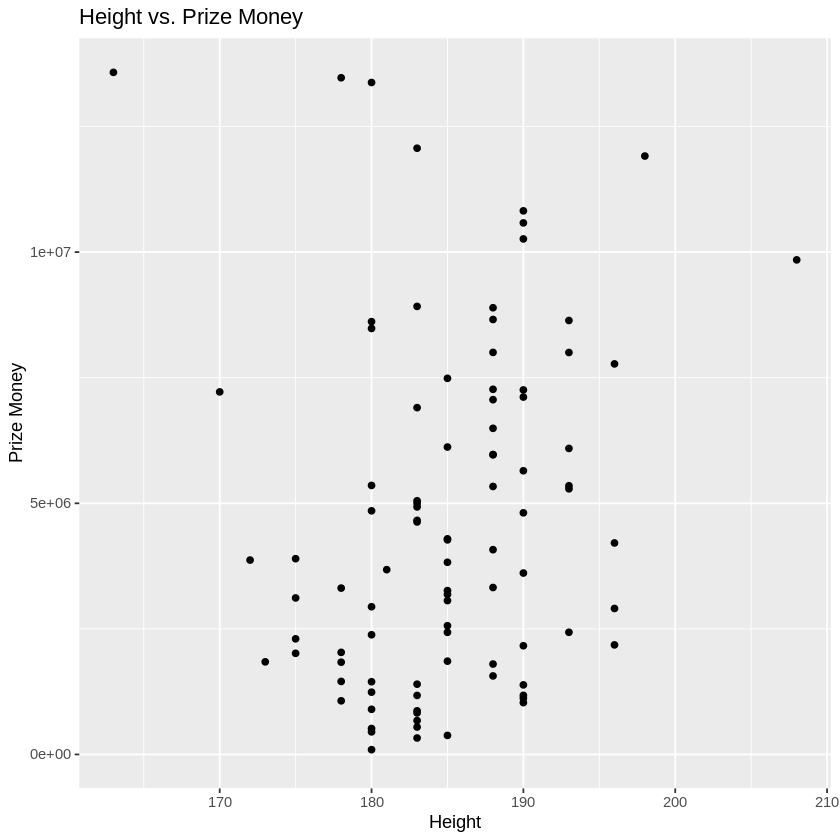

Warning message:
“Removed 99 rows containing missing values (geom_point).”


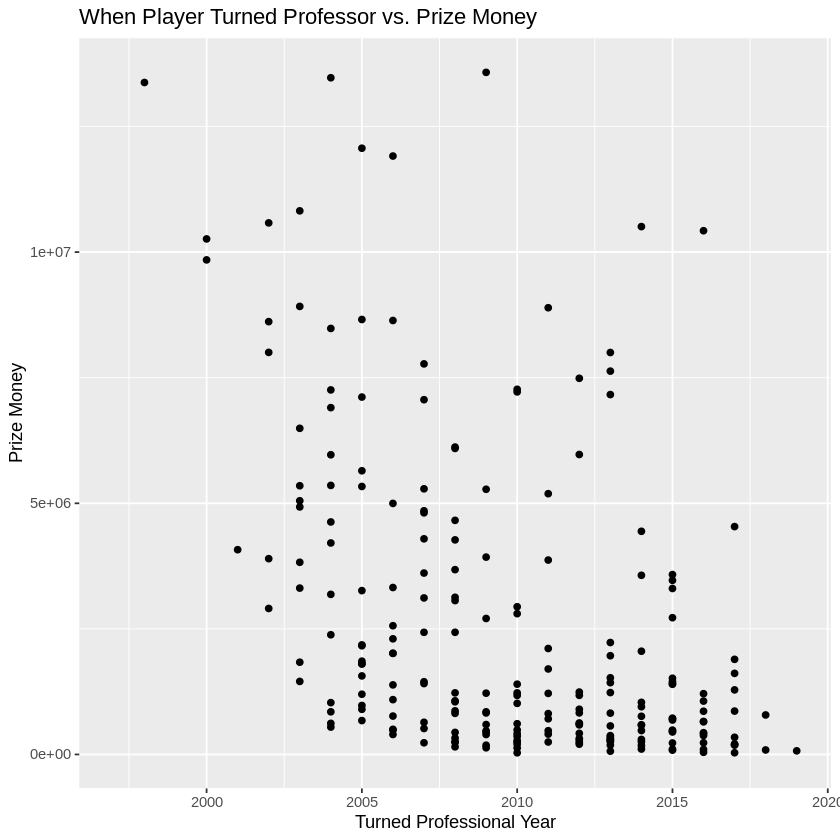

Warning message:
“Removed 151 rows containing missing values (geom_point).”


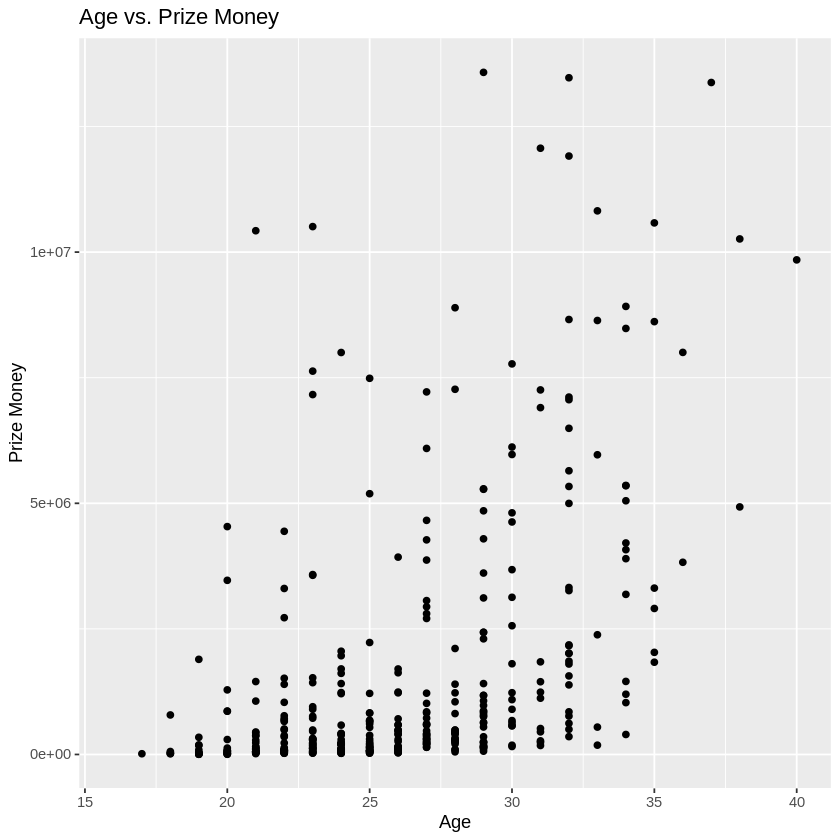

Warning message:
“Removed 99 rows containing missing values (geom_point).”


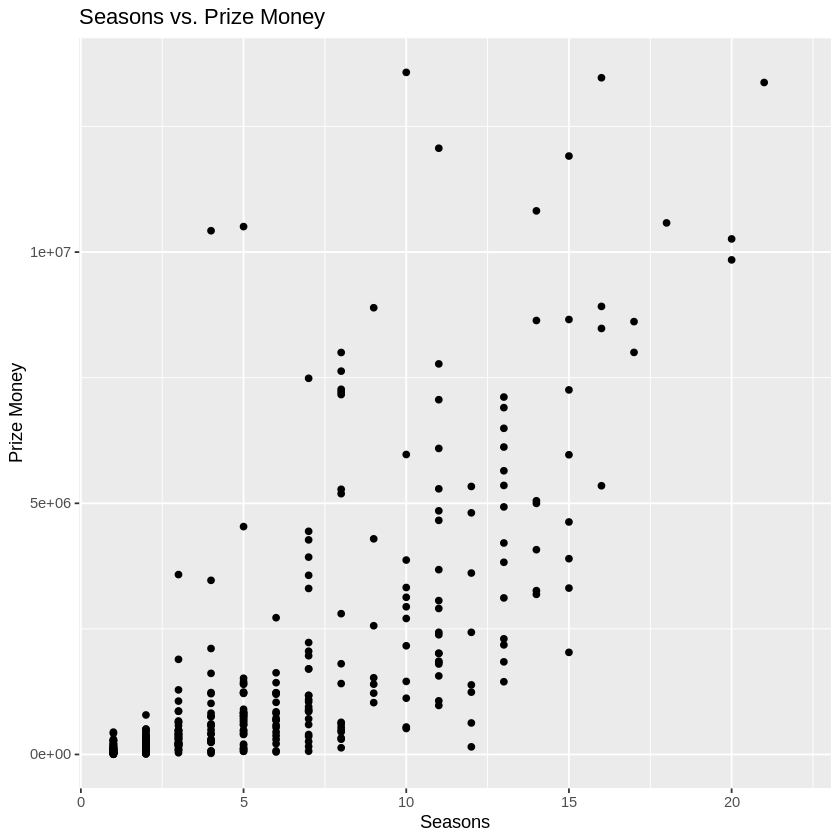

Warning message:
“Removed 99 rows containing missing values (geom_point).”


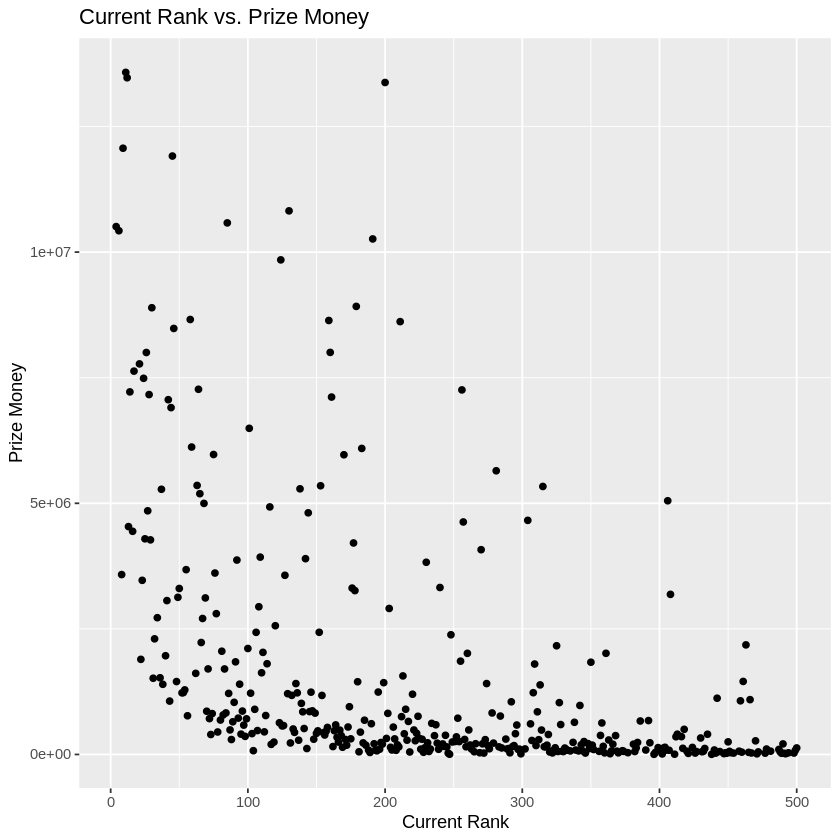

Warning message:
“Removed 333 rows containing missing values (geom_point).”


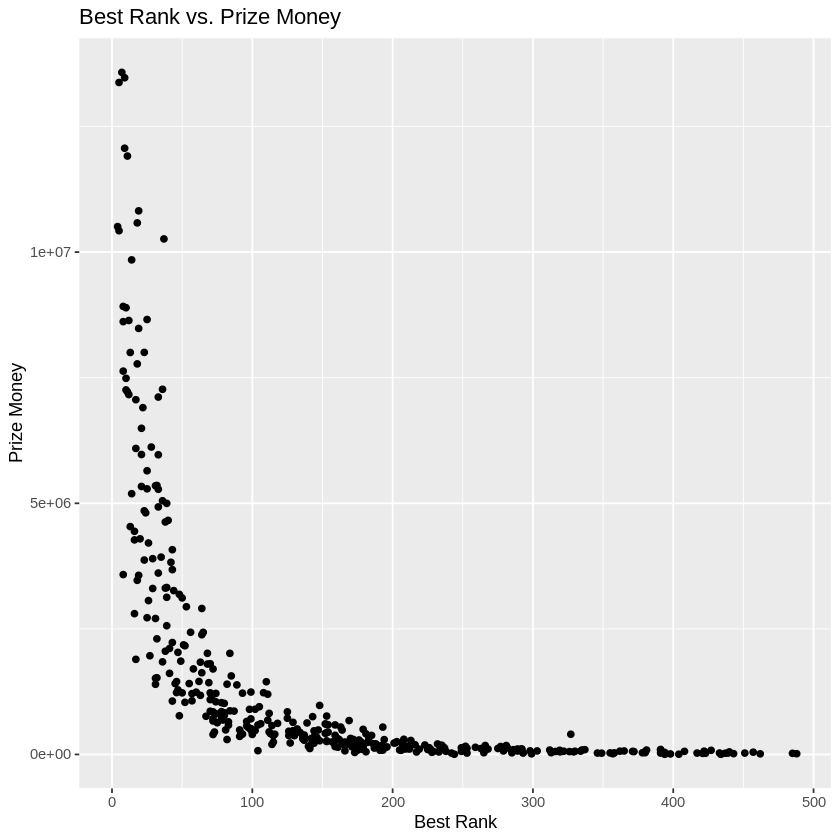

Warning message:
“Removed 282 rows containing missing values (geom_point).”


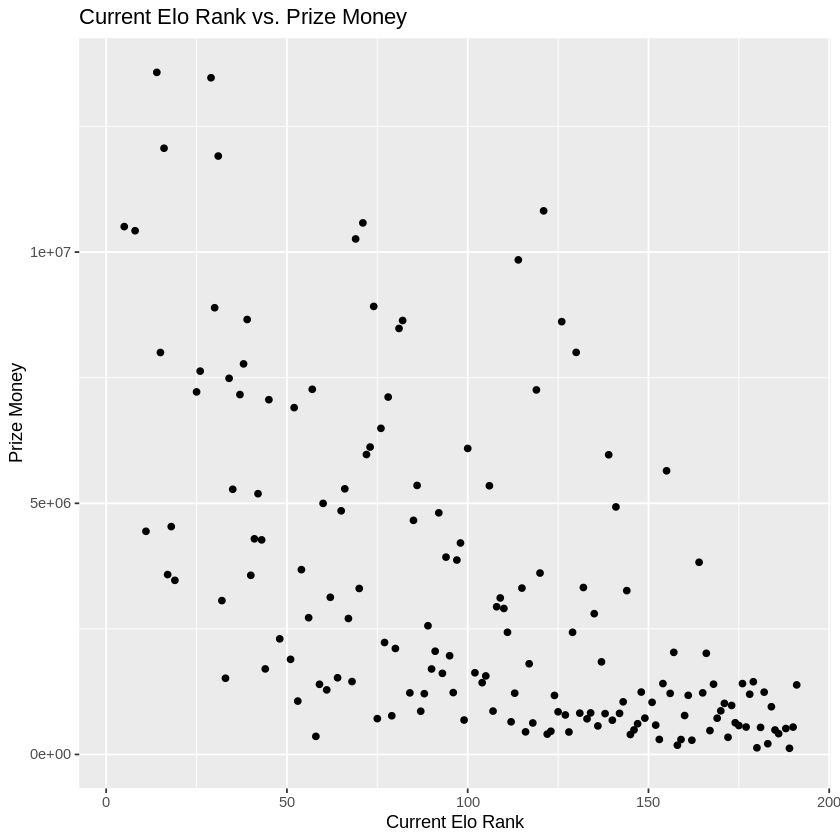

Warning message:
“Removed 282 rows containing missing values (geom_point).”


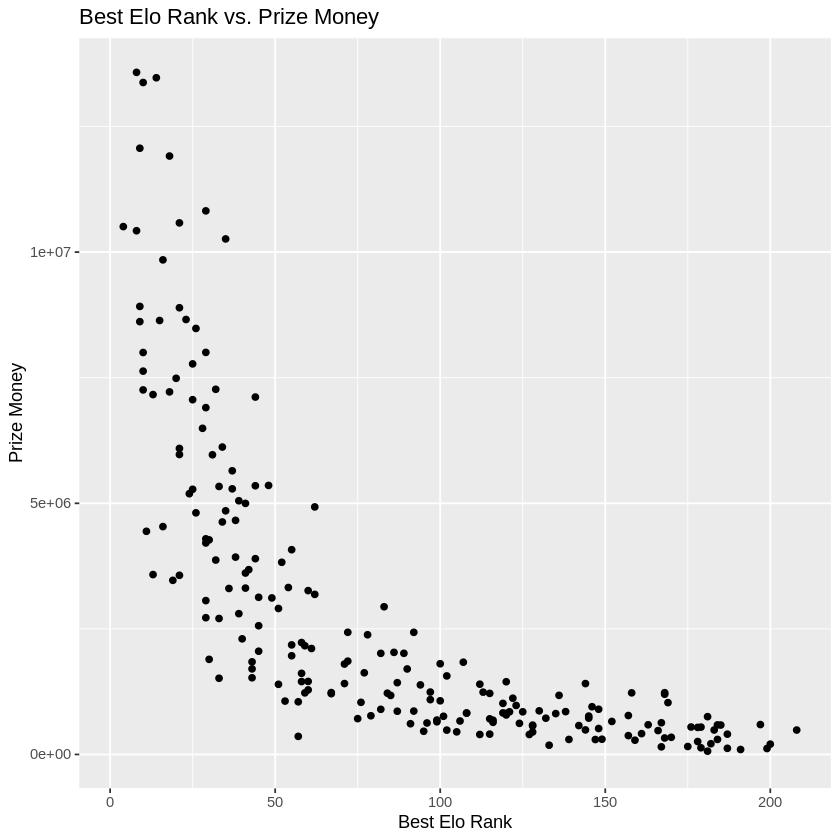

Warning message:
“Removed 99 rows containing missing values (geom_point).”


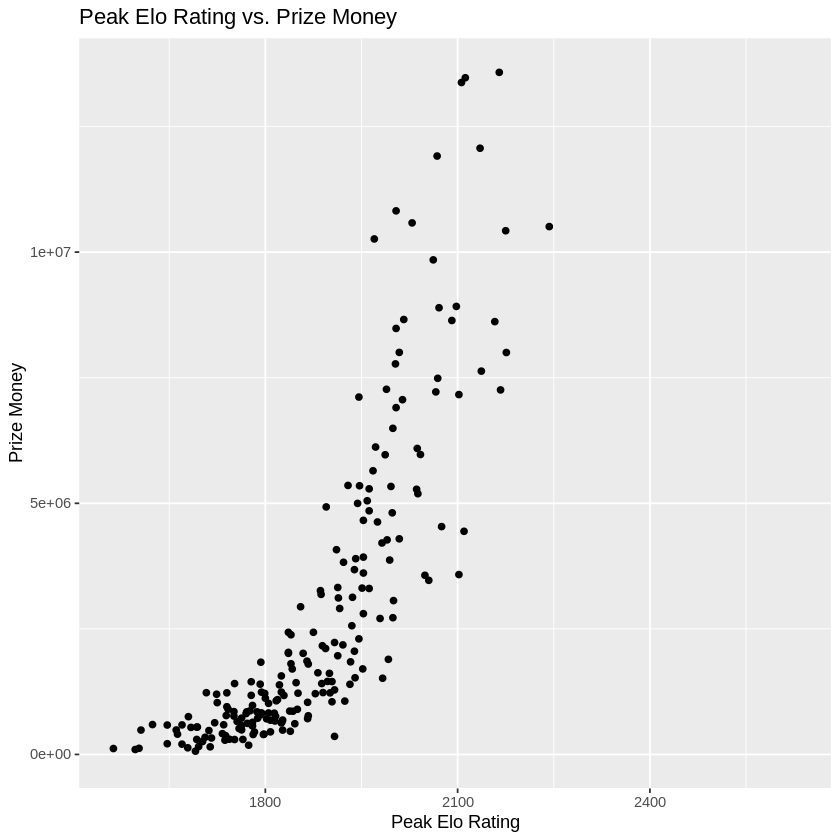

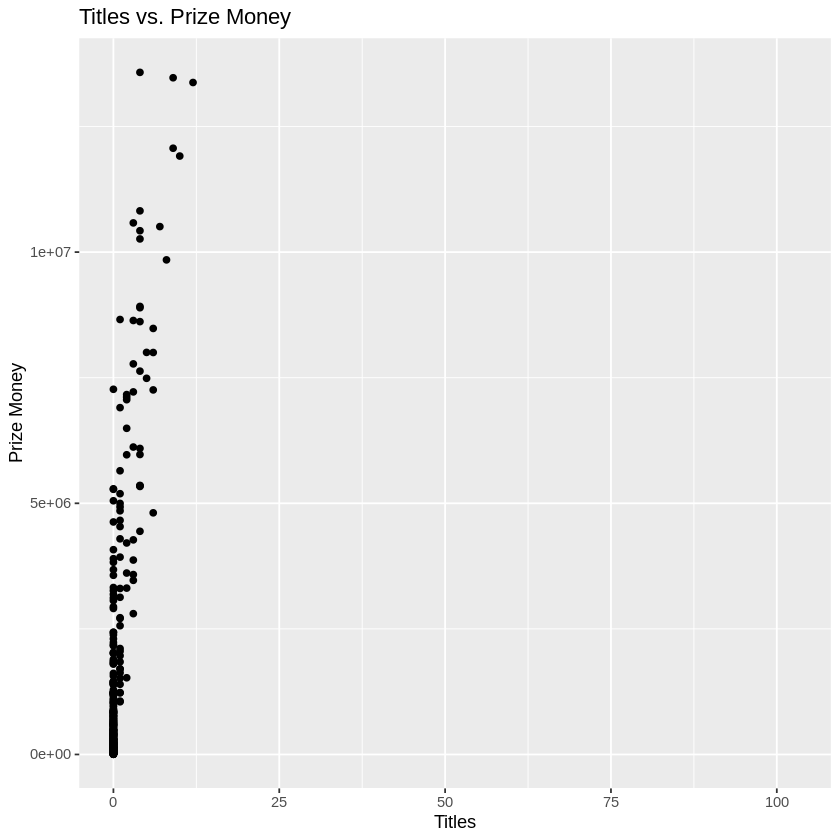

In [46]:
height_momeny_plot <- tidy_data %>%
    ggplot(aes(x = height, y = prize_money)) + 
        geom_point() + 
        labs(x = "Height", y = "Prize Money") +
        ggtitle("Height vs. Prize Money")
height_momeny_plot
turnPro_momeny_plot <- tidy_data %>%
    ggplot(aes(x = turned_pro, y = prize_money)) + 
        geom_point() + 
        labs(x = "Turned Professional Year", y = "Prize Money") +
        ggtitle("When Player Turned Professor vs. Prize Money")
turnPro_momeny_plot
age_momeny_plot <- tidy_data %>%
    ggplot(aes(x = age, y = prize_money)) + 
        geom_point() + 
        labs(x = "Age", y = "Prize Money") +
        ggtitle("Age vs. Prize Money")
age_momeny_plot
season_momeny_plot <- tidy_data %>%
    ggplot(aes(x = seasons, y = prize_money)) + 
        geom_point() + 
        labs(x = "Seasons", y = "Prize Money") +
        ggtitle("Seasons vs. Prize Money")
season_momeny_plot
rank_momeny_plot1 <- tidy_data %>%
    ggplot(aes(x = current_rank, y = prize_money)) + 
        geom_point() + 
        labs(x = "Current Rank", y = "Prize Money") +
        ggtitle("Current Rank vs. Prize Money")
rank_momeny_plot1
rank_momeny_plot2 <- tidy_data %>%
    ggplot(aes(x = best_rank, y = prize_money)) + 
        geom_point() + 
        labs(x = "Best Rank", y = "Prize Money") +
        ggtitle("Best Rank vs. Prize Money")
rank_momeny_plot2
rank_momeny_plot3 <- tidy_data %>%
    ggplot(aes(x = current_elo_rank, y = prize_money)) + 
        geom_point() + 
        labs(x = "Current Elo Rank", y = "Prize Money") +
        ggtitle("Current Elo Rank vs. Prize Money")
rank_momeny_plot3
rank_momeny_plot4 <- tidy_data %>%
    ggplot(aes(x = best_elo_rank, y = prize_money)) + 
        geom_point() + 
        labs(x = "Best Elo Rank", y = "Prize Money") +
        ggtitle("Best Elo Rank vs. Prize Money")
rank_momeny_plot4
rating_momeny_plot <- tidy_data %>%
    ggplot(aes(x = peak_elo_rating, y = prize_money)) + 
        geom_point() + 
        labs(x = "Peak Elo Rating", y = "Prize Money") +
        ggtitle("Peak Elo Rating vs. Prize Money")
rating_momeny_plot
titles_momeny_plot <- tidy_data %>%
    ggplot(aes(x = titles, y = prize_money)) + 
        geom_point() + 
        labs(x = "Titles", y = "Prize Money") +
        ggtitle("Titles vs. Prize Money")
titles_momeny_plot

Seen from plots above, we find: 
* (1) height barely have any relationships with price money.
* (2) Turn Pro, Current Rank, Current Elo Rank have weak negative relationships with price money.
* (3) Best Rank, Best Elo Rank have strong negative relationships with price money.
* (4) Age, Titles have weak positve relationships with price money.
* (5) Seaons, Peak Elo Rating have strong possitve relationships with price money.

As a result, we decide to choose all numerical columns accept height. Furthermore, we decide to use linear regression as model first because it is better at predicting linear relationships.

## Remove all the NA in the dataset and split the data:

In [47]:
set.seed(2000)
tidy_data <- tidy_data %>%
          filter(prize_money != "NA", seasons != "NA", turned_pro != "NA", best_elo_rank != "NA", peak_elo_rating != "NA"
                    ,current_elo_rank != "NA" ,best_rank != "NA", current_rank != "NA", plays != "NA", backhand != "NA") %>%
          select(-height)
data_split <- initial_split(tidy_data, prop = 0.6, strata = prize_money)
data_training <- training(data_split)
data_testing <- testing(data_split)
data_training

age,plays,current_rank,backhand,prize_money,turned_pro,seasons,current_elo_rank,best_elo_rank,peak_elo_rating,titles,best_rank
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
31,1,9,1,12067808,2005,11,16,9,2135,9,9
29,1,11,1,13578010,2009,10,14,8,2165,4,7
32,1,12,1,13470614,2004,16,29,14,2112,9,9
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,0,274,1,1411268,2015,5,154,71,1888,0,45
27,1,304,1,4660132,2008,11,85,38,1953,1,40
32,1,361,1,2013618,2006,11,166,89,1836,0,68


## Predict the price money using Linear regression:

In [48]:
set.seed(2000)
lm_spec <- linear_reg() %>% 
      set_engine("lm") %>%
      set_mode("regression")
lm_data_recipe <-  recipe(prize_money ~ plays + backhand + turned_pro + age + current_rank + seasons + best_elo_rank + 
                       peak_elo_rating + current_elo_rank + best_rank + titles, data = data_training)
lm_data_fit <- workflow() %>%
      add_recipe(lm_data_recipe) %>%
      add_model(lm_spec) %>%
      fit(data = data_training)
lm_data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)             plays          backhand        turned_pro  
      -9.989e+07        -3.993e+05         6.794e+05         2.465e+04  
             age      current_rank           seasons     best_elo_rank  
       1.090e+05         5.174e+02         2.485e+05         4.927e+04  
 peak_elo_rating  current_elo_rank         best_rank            titles  
       2.448e+04        -1.827e+04        -6.679e+03         4.179e+05  


### So the mathematical equations for the linear regression prediction model is:
$Price\: Money = -(9.989e+07) - (3.993e+05)*Plays + (6.794e+05)*Backhand + (2.465e+04)*Turned\: Pro + (1.090e+05)*Age  + (5.174e+02)*Current\: Rank + (2.485e+05)*Seasons + (4.927e+04)*Best\: Elo\: Rank + (2.448e+04)*Peak\: Elo\: Rating - (1.827e+04)*Current\: Elo\: Rank - (6.679e+03)*Best\: Rank + (4.179e+05)*Titles$

## Compute RMSE and RMSPE of Linear regression

In [49]:
lm_rmse <- lm_data_fit %>%
        predict(data_training) %>%
        bind_cols(data_training) %>%
        metrics(truth = prize_money, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmse

[1] 1083658

In [50]:
lm_rmspe <- lm_data_fit %>%
        predict(data_testing) %>%
        bind_cols(data_testing) %>%
        metrics(truth = prize_money, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmspe

[1] 1318061

RMSE of linear regression is 1083657, RMSPE is 1318061, which is a little larger than RMSE. So the predict model is vaild.

## Predict the price money using Knn regression and compute its RMSPE:

### Select the appropriate predictors for Knn regression using forward selection:

In [51]:
set.seed(2000)
rmses <- tibble(size = integer(), 
                     model_string = character(), 
                     rmse = numeric())
knn_data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
select_vfold <- vfold_cv(data_training, v = 5, strata = prize_money)
names <- colnames(tidy_data %>% select(-prize_money))
n_total <- length(names)
selected <- c()
for (i in 1:n_total) {
    all <- list()
    models <- list()
    for (j in 1:length(names)) {
        preds_new <- c(selected, names[[j]])
        model_string <- paste("prize_money", "~", paste(preds_new, collapse="+"))

        data_recipe_for <- recipe(as.formula(model_string), 
                                data = data_training) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())
        ele <- workflow() %>%
          add_recipe(data_recipe_for) %>%
          add_model(knn_data_spec) %>%
          tune_grid(resamples = select_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "rmse") %>%
          summarize(mx = max(mean))
        ele <- ele$mx %>% unlist()
        all[[j]] <- ele
        models[[j]] <- model_string
    }
    index <- which.max(unlist(all))
    rmses <- rmses %>% 
      add_row(size = i, 
              model_string = models[[index]], 
              rmse = all[[index]])
    selected <- c(selected, names[[index]])
    names <- names[-index]
}
rmses

! Fold2: internal: A correlation computation is required, but `estimate` is const...

! Fold1: internal: A correlation computation is required, but `estimate` is const...



size,model_string,rmse
<int>,<chr>,<dbl>
1,prize_money ~ backhand,9231341
2,prize_money ~ backhand+plays,8601332
3,prize_money ~ backhand+plays+turned_pro,5296571
⋮,⋮,⋮
9,prize_money ~ backhand+plays+turned_pro+seasons+age+current_rank+best_rank+titles+best_elo_rank,2275023
10,prize_money ~ backhand+plays+turned_pro+seasons+age+current_rank+best_rank+titles+best_elo_rank+current_elo_rank,1973279
11,prize_money ~ backhand+plays+turned_pro+seasons+age+current_rank+best_rank+titles+best_elo_rank+current_elo_rank+peak_elo_rating,1789874


As seen above, the RMSE is smaller when we chose more predictors. So, we decide to choose all the columns remain in the dataset as predictors in our Knn regresion model.

### Choose the best number of neighbors for the knn regression:

In [52]:
set.seed(2000)
data_recipe_scaled <- lm_data_recipe %>%
                  step_scale(all_predictors()) %>%
                  step_center(all_predictors())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fold <- vfold_cv(data_training, v = 5, strata = prize_money)
gridvals <- tibble(neighbors = seq(1,50))
data_workflow <- workflow() %>%
                 add_recipe(data_recipe_scaled) %>%
                 add_model(knn_spec)
result <- data_workflow %>%
                       tune_grid(resamples = data_fold, grid = gridvals) %>%
                       collect_metrics() %>%
                       filter(.metric == 'rmse') %>%
                       filter(mean == min(mean)) %>%
                       select(n) %>%
                       pull()
result

[1] 5

### Use the result k = 5 for the model and compute the RMSE as well as RMSPE:

In [53]:
set.seed(2000)
knn_data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = result) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
knn_data_fit <- workflow() %>%
           add_recipe(data_recipe_scaled) %>%
           add_model(knn_data_spec) %>%
           fit(data = data_training)
rmse_data_summary <- knn_data_fit %>% 
           predict(data_training) %>%
           bind_cols(data_training) %>%
           metrics(truth = prize_money, estimate = .pred)
knn_rmse <- rmse_data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
rmspe_data_summary <- knn_data_fit %>% 
           predict(data_testing) %>%
           bind_cols(data_testing) %>%
           metrics(truth = prize_money, estimate = .pred)
knn_rmspe <- rmspe_data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
knn_rmse
knn_rmspe

[1] 1286583

[1] 1320740

The RMSE of knn-regression is 1286583, RMSPE is 1320740, which is also a little larger than RMSE. So the predict model is also vaild.

## Choose and visualize the prediction

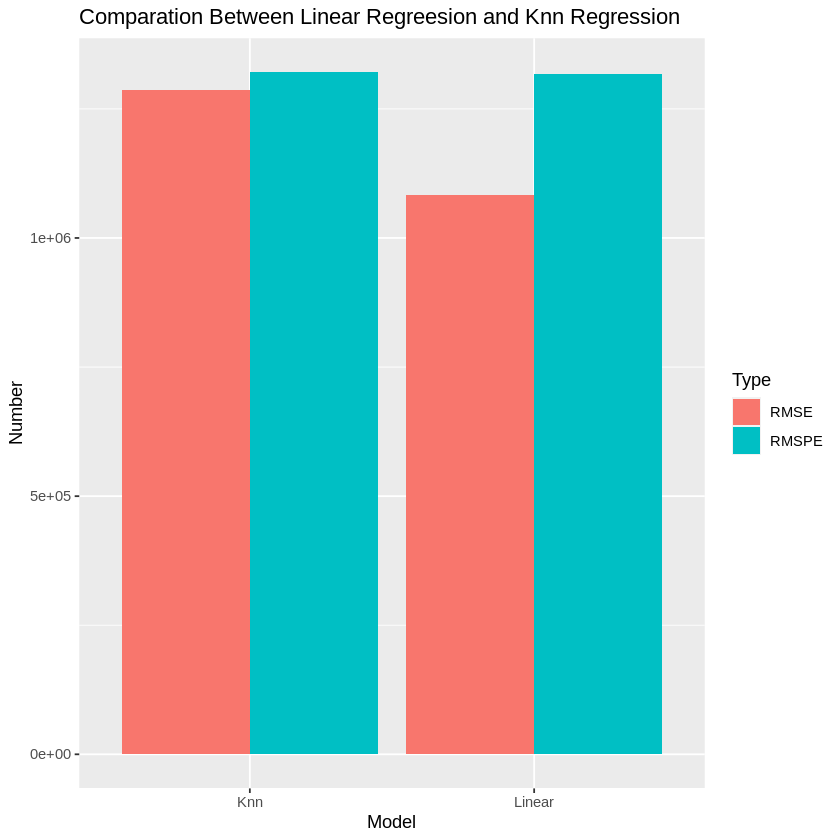

In [54]:
differences <- tibble(m = c("Linear","Linear","Knn","Knn"), r = c("RMSE","RMSPE","RMSE","RMSPE"), n = c(lm_rmse, lm_rmspe, knn_rmse, knn_rmspe))
differences_plot <- differences %>%
                ggplot(aes(x = m, y = n, fill = r)) + 
   geom_bar(stat = "identity", position = "dodge") + 
  xlab("Model") +
  ylab("Number") +
  labs(fill = "Type") +
  ggtitle("Comparation Between Linear Regreesion and Knn Regression")
differences_plot

Seen from the plot above, we see the difference between RMSE and RMSPE is smaller at Knn Regression, and the  RMSPE of Knn and Linear is barely the same.
As a result, we dicide to use Knn regression.

### Visualize the knn-regression:
Because we use 11 predictors in our knn-regression model, so our regression is a very high dimenesional model.
As we learned so far in the class, we can only slide the model into different lines and put them in plots.

Warning message:
“Removed 99 rows containing missing values (geom_point).”
Warning message:
“Removed 99 rows containing missing values (geom_point).”


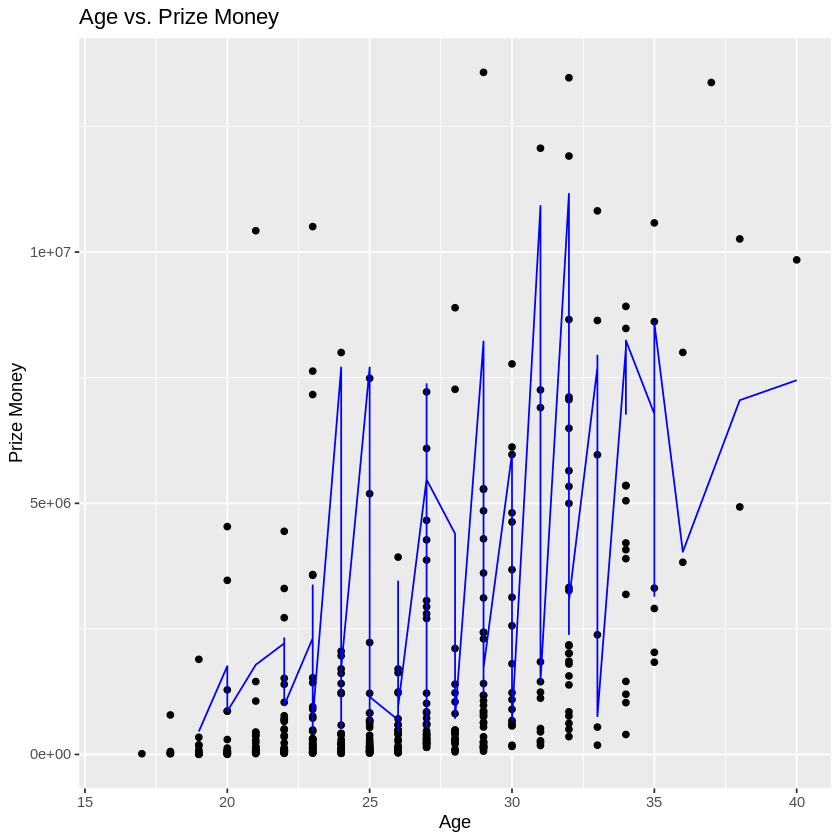

Warning message:
“Removed 99 rows containing missing values (geom_point).”


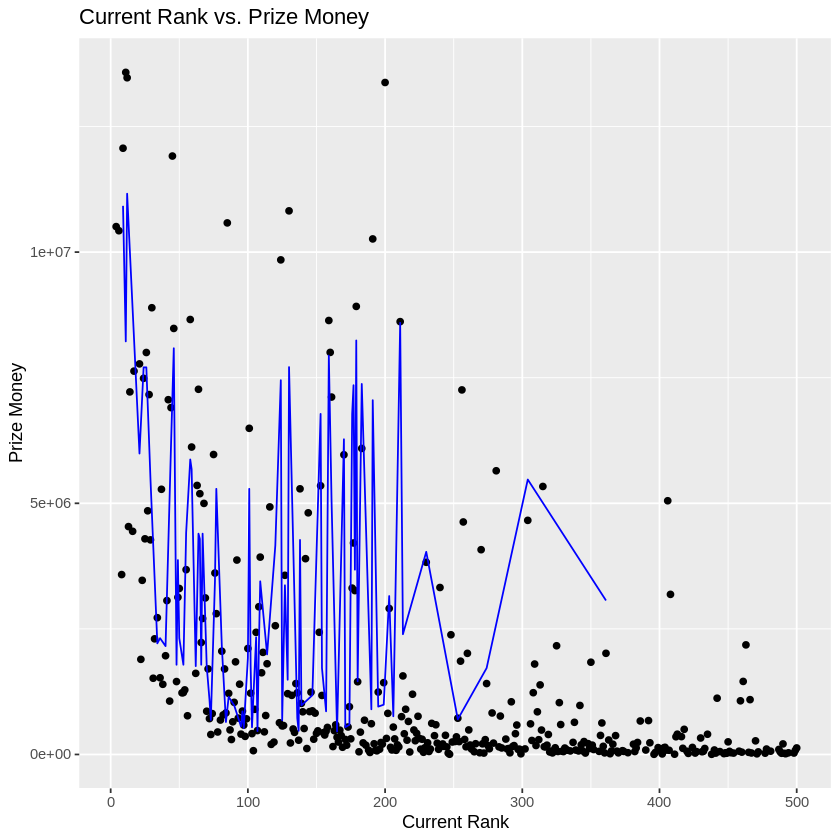

Warning message:
“Removed 333 rows containing missing values (geom_point).”


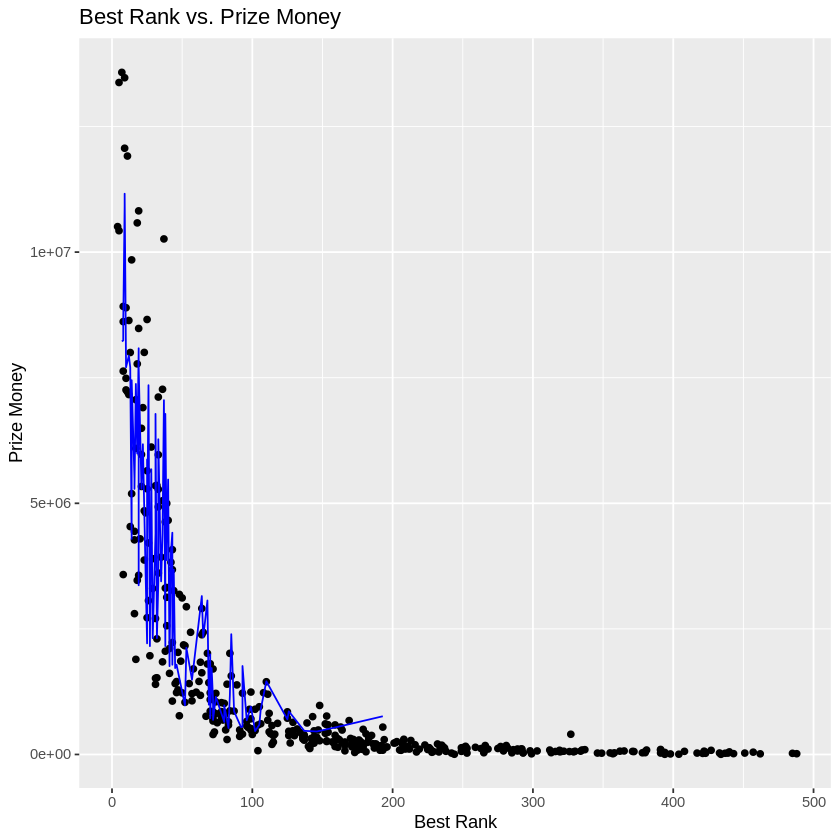

Warning message:
“Removed 282 rows containing missing values (geom_point).”


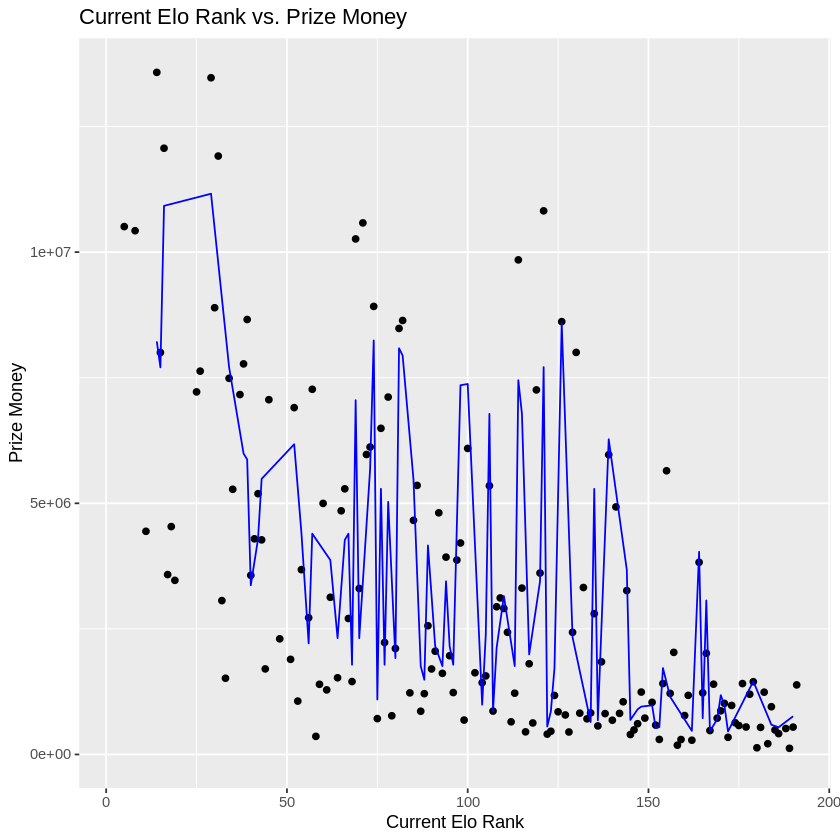

Warning message:
“Removed 282 rows containing missing values (geom_point).”


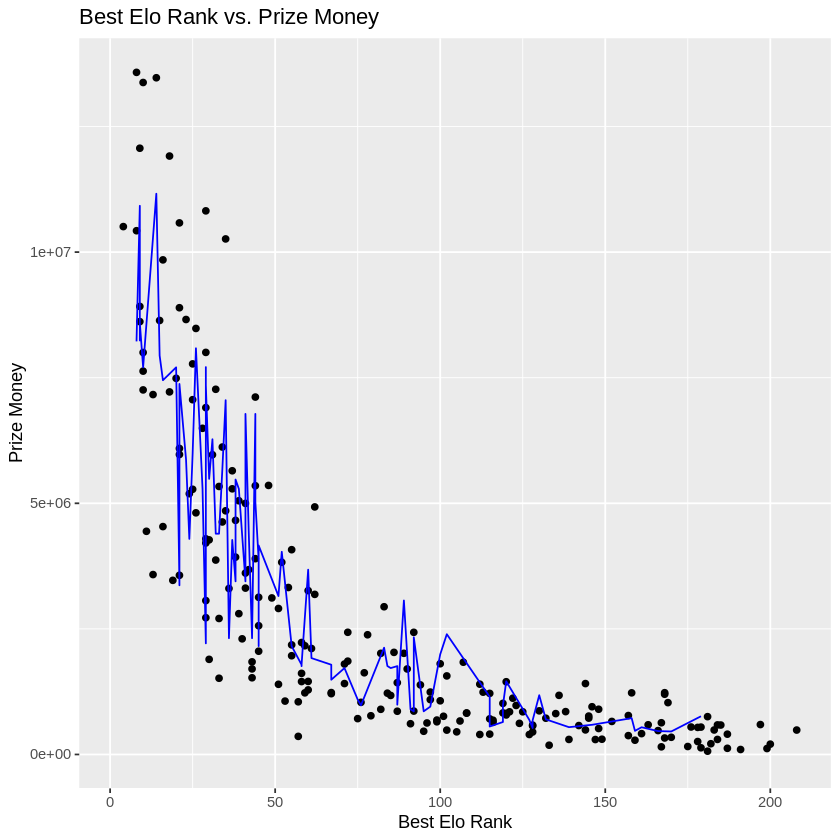

Warning message:
“Removed 151 rows containing missing values (geom_point).”


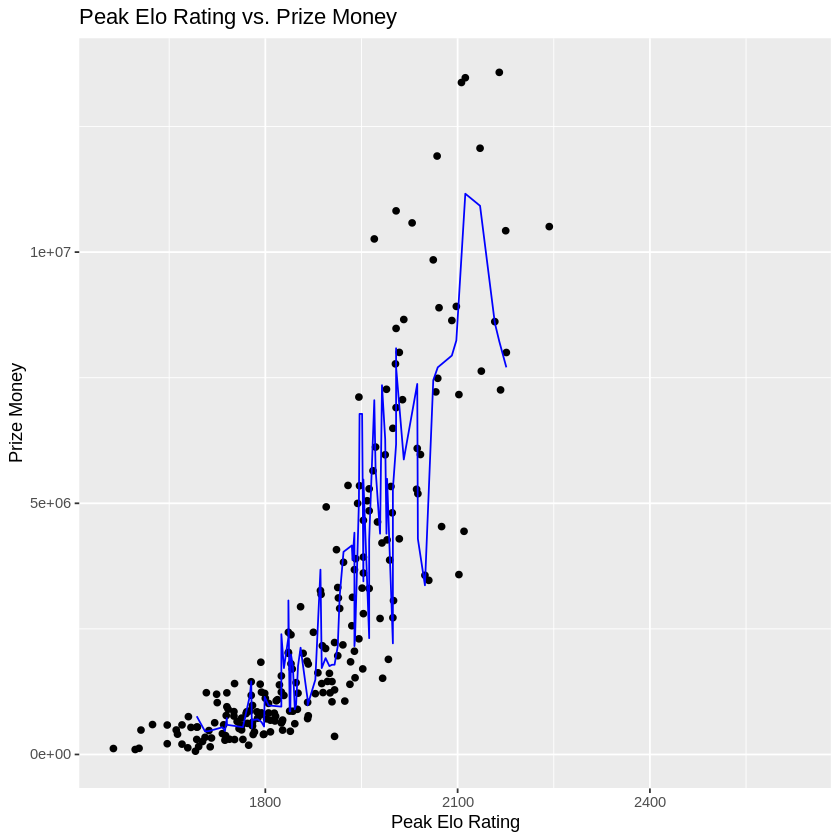

Warning message:
“Removed 99 rows containing missing values (geom_point).”


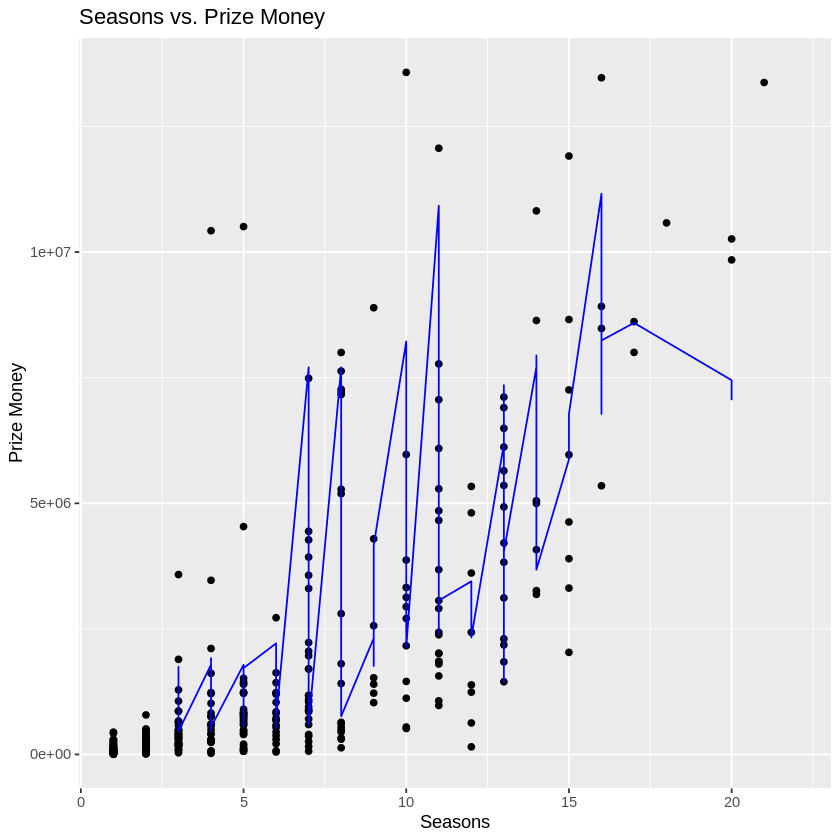

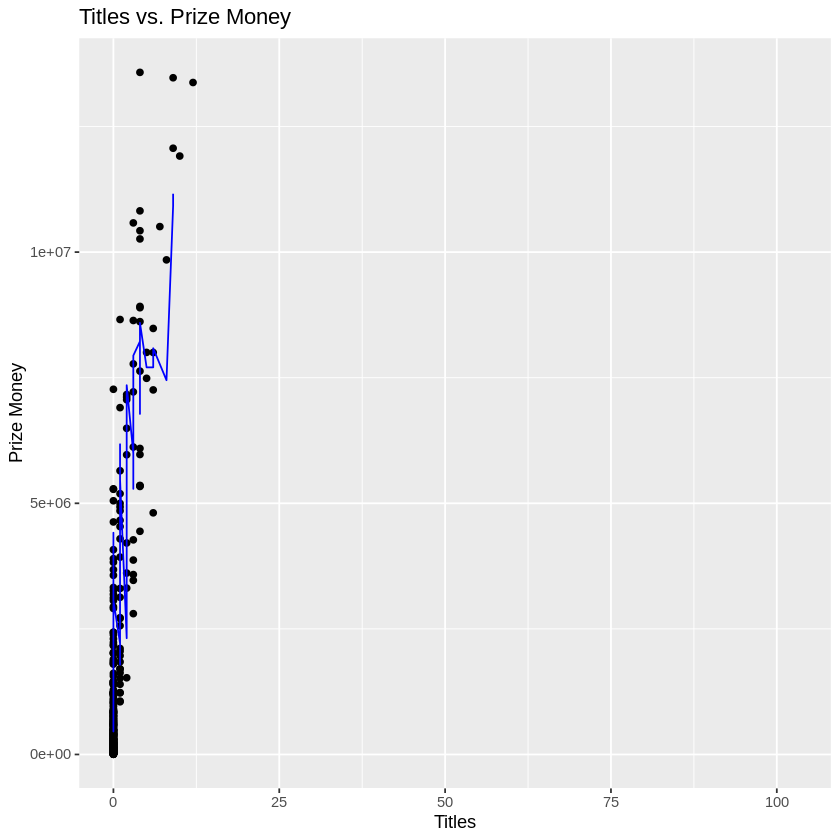

In [56]:
data_preds <- knn_data_fit %>%
       predict(data_training) %>%
       bind_cols(data_training)
age_momeny_regression_plot <- age_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = age, y = .pred), color = "blue")
age_momeny_regression_plot
rank_momeny_regression_plot1 <- rank_momeny_plot1 +
       geom_line(data = data_preds, mapping = aes(x = current_rank, y = .pred), color = "blue")
rank_momeny_regression_plot1
rank_momeny_regression_plot2 <- rank_momeny_plot2 +
       geom_line(data = data_preds, mapping = aes(x = best_rank, y = .pred), color = "blue")
rank_momeny_regression_plot2
rank_momeny_regression_plot3 <- rank_momeny_plot3 +
       geom_line(data = data_preds, mapping = aes(x = current_elo_rank, y = .pred), color = "blue")
rank_momeny_regression_plot3
rank_momeny_regression_plot4 <- rank_momeny_plot4 +
       geom_line(data = data_preds, mapping = aes(x = best_elo_rank, y = .pred), color = "blue")
rank_momeny_regression_plot4
rating_momeny_regression_plot <- rating_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = peak_elo_rating, y = .pred), color = "blue")
rating_momeny_regression_plot
season_momeny_regression_plot <- season_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = seasons, y = .pred), color = "blue")
season_momeny_regression_plot
title_momeny_regression_plot <- titles_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = titles, y = .pred), color = "blue")
title_momeny_regression_plot

## Result

As a summary of our method section, we generated plots to check for the relationship between the price money and the prediction variables. We took all variables that had a relationship to generate the regression models. After comparing the RMSE (Root mean squared error) and RMSPE (Root mean squared prediction error) of linear and KNN regression models, we discovered that the KNN model has a slightly smaller RMSPE than the linear model. At the same time, the linear regression model has a lower RMSE than the KNN regression model.

Due to the smaller difference between RMSE and RMSPE of KNN regression, and how RMSPE is more significant as it is the value generated from the testing data set,  we decided to choose the KNN regression as the prediction model.

We then generated plots between each predictor and the price money using KNN regression as we cannot generate all predictors in one 2D graph or generate multidimensional graphs. From the graph, some predictors have larger residuals such as Age, Current Rank, Current Elo Rank, Seasons, and titles. Some have smaller residuals such as Best Rank, Best Elo Rank and Peak Elo Rating. This suggests that variables with smaller residuals would have stronger predictive power to the prediction. 

The large residuals may be evidence of overfitting, thus, our model would still have room for improvement in the future. Forward selection is a stepwise regression model that may be a better way to improve our current model. It starts with an empty model and adds in the  variables one by one. In each step, you would add the variable that gives the best improvement to the model. Eventually, we would stop adding variables when the model  no longer improves.

## Discussion

First, we started off by cleaning the data, like we removed the columns where there is unwanted information in the data and even the columns where the information is not present in all the rows. Then, we started selecting the columns which we need for doing the visualisations. Then by picking the predictors, we started plotting graphs for finding the relationship between the predictors and the price money and we came to a conclusion that all the predictors are in a linear relationship with the price money. 



## References

Image: https://cdn.mos.cms.futurecdn.net/KEnZEGi8VJvks7NGKogrxG-1200-80.jpg

Ioc. (2021, July 14). A brief history of tennis. Retrieved April 7, 2022, from https://olympics.com/ioc/news/a-brief-history-of-tennis
